Исследование показателей о распространенности депрессивных расстройств среди мужчин и женщин, а также информацию о населении по странам и годам.

# Чтение данных и преобразование

In [57]:
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()  # Загрузите kaggle.json
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [58]:
!mkdir -p ~/.kaggle  # Создание директории для хранения API ключа
!mv kaggle.json ~/.kaggle/  # Перемещение файла в эту директорию
!chmod 600 ~/.kaggle/kaggle.json  # Установка прав доступа

mv: cannot stat 'kaggle.json': No such file or directory


In [59]:
!kaggle datasets download -d programmerrdai/mental-health-dataset

Dataset URL: https://www.kaggle.com/datasets/programmerrdai/mental-health-dataset
License(s): CC0-1.0
mental-health-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [60]:
!unzip mental-health-dataset.zip

Archive:  mental-health-dataset.zip
replace mental-and-substance-use-as-share-of-disease.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mental-and-substance-use-as-share-of-disease.csv  
  inflating: prevalence-by-mental-and-substance-use-disorder.csv  
  inflating: prevalence-of-depression-males-vs-females.csv  
  inflating: share-with-depression.csv  
  inflating: share-with-mental-and-substance-disorders.csv  
  inflating: share-with-mental-or-substance-disorders-by-sex.csv  


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Загрузка данных из файла
df = pd.read_csv('prevalence-of-depression-males-vs-females.csv')

# Отобразить первые несколько строк
df.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,NaN
2,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,NaN
3,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,NaN
4,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,NaN


Entity: Название страны или региона.

Code: Код страны или региона.

Year: Год наблюдений.

Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent): Доля депрессивных расстройств у мужчин (в процентах), стандартизированная по возрасту.

Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent): Доля депрессивных расстройств у женщин (в процентах), стандартизированная по возрасту.

Population (historical estimates): Оценки численности населения.

Continent: Континент (очень неполные данные, так как многие значения отсутствуют).

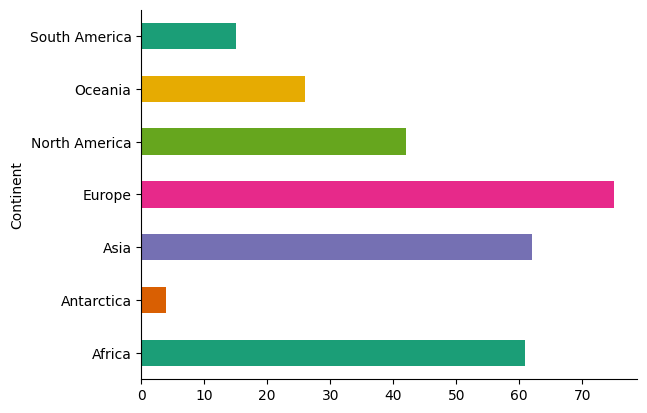

In [62]:
df.groupby('Continent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [63]:
df['Continent'].value_counts()

,count
Continent,
Europe,75
Asia,62
Africa,61
North America,42
Oceania,26
South America,15
Antarctica,4


In [64]:
# Шаг 1: Исключение нерелевантных строк (агрегированные регионы и группы)
regions_to_exclude.extend([
    'African Region (WHO)', 'Europe', 'European Region (WHO)', 'G20',
    'North America (WB)', 'South Asia (WB)', 'South-East Asia Region (WHO)'
])

df = df[~df['Entity'].isin(regions_to_exclude)]
country_to_continent.update({
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'China': 'Asia',
    'England': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'India': 'Asia',
    'Italy': 'Europe',
    'Netherlands Antilles': 'North America',
    'Russia': 'Europe',
    'Saint Barthlemy': 'North America',
    'Saint Helena': 'Africa',
    'Saint Martin (French part)': 'North America',
    'Saint Pierre and Miquelon': 'North America',
    'Sint Maarten (Dutch part)': 'North America',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Svalbard and Jan Mayen': 'Europe',
    'Turks and Caicos Islands': 'North America',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Vatican': 'Europe',
    'Wales': 'Europe',
    'Wallis and Futuna': 'Oceania'
})
# Шаг 3: Заполнение пропусков снова
df.loc[:, 'Continent'] = df['Continent'].fillna(df['Entity'].map(country_to_continent))

# Шаг 4: Проверка оставшихся стран без континента
missing_continents = df['Continent'].isnull().sum()
print(f'Пропусков в столбце Continent после повторного заполнения: {missing_continents}')

# Проверим страны, для которых континенты всё ещё не заполнены
countries_without_continent = df[df['Continent'].isnull()]['Entity'].unique()
print('Страны без континента после повторного заполнения:', countries_without_continent)

Пропусков в столбце Continent после повторного заполнения: 0
Страны без континента после повторного заполнения: []


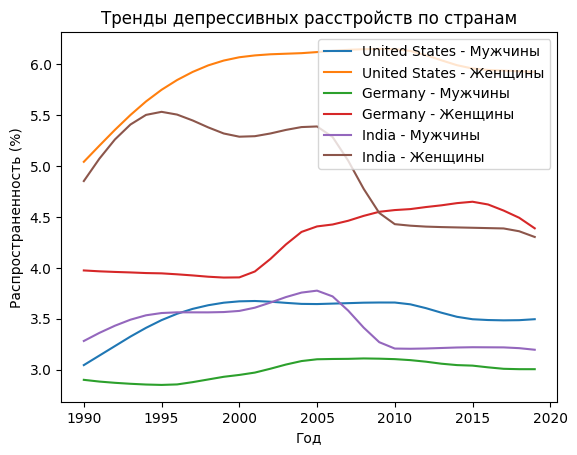

In [65]:
# Преобразование нужных столбцов к числовому формату
df['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'] = pd.to_numeric(df['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'], errors='coerce')
df['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'] = pd.to_numeric(df['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'], errors='coerce')

# Список стран для анализа
countries = ['United States', 'Germany', 'India']  # Добавьте или измените список стран

# Построение графиков для каждой страны
for country in countries:
    df_country = df[df['Entity'] == country]

    # Рассчет средних значений по годам для мужчин и женщин
    plt.plot(df_country['Year'], df_country['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'], label=f'{country} - Мужчины')
    plt.plot(df_country['Year'], df_country['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'], label=f'{country} - Женщины')

# Настройка графиков
plt.title('Тренды депрессивных расстройств по странам')
plt.xlabel('Год')
plt.ylabel('Распространенность (%)')
plt.legend()
plt.show()


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54012 entries, 0 to 56394
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             54012 non-null  object 
 1   Code                                                                               53820 non-null  object 
 2   Year                                                                               54012 non-null  int64  
 3   Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)    6240 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)  6240 non-null   float64
 5   Population (historical estimates)                                                  53843 non-null  float64
 

In [67]:
df.isna().mean().sort_values(ascending=False)

,0
Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent),0.884470
Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent),0.884470
Code,0.003555
Population (historical estimates),0.003129
Entity,0.000000
Year,0.000000
Continent,0.000000


# 1. Анализ гендерных различий депрессии по континентам

## США

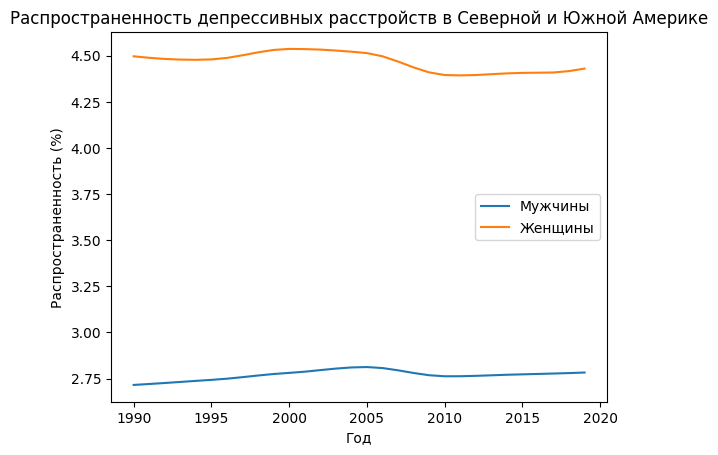

In [68]:
# Убираем строки с отсутствующими значениями
df_filtered = df.dropna(subset=[
    'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
    'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'
])

# Фильтрация данных для континентов Северной и Южной Америки
continents = ['North America', 'South America']
df_americas = df_filtered[df_filtered['Continent'].isin(continents)]

# Оставляем только нужные числовые столбцы
df_americas_numeric = df_americas[['Year',
                                   'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
                                   'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)']]

# Группировка по годам и расчет среднего значения по мужчинам и женщинам
df_grouped = df_americas_numeric.groupby('Year').mean()

# Построение графиков
plt.plot(df_grouped.index, df_grouped['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'], label='Мужчины')
plt.plot(df_grouped.index, df_grouped['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'], label='Женщины')
plt.title('Распространенность депрессивных расстройств в Северной и Южной Америке')
plt.xlabel('Год')
plt.ylabel('Распространенность (%)')
plt.legend()
plt.show()


In [69]:
male_mean = df_americas['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].mean()
female_mean = df_americas['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].mean()

print(f"Средняя распространенность депрессии у мужчин: {male_mean:.2f}%")
print(f"Средняя распространенность депрессии у женщин: {female_mean:.2f}%")

Средняя распространенность депрессии у мужчин: 2.77%
Средняя распространенность депрессии у женщин: 4.47%


In [70]:
corr_male = df_americas['Population (historical estimates)'].corr(df_americas['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'])
corr_female = df_americas['Population (historical estimates)'].corr(df_americas['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'])

print(f"Корреляция между численностью населения и депрессией у мужчин: {corr_male:.2f}")
print(f"Корреляция между численностью населения и депрессией у женщин: {corr_female:.2f}")

Корреляция между численностью населения и депрессией у мужчин: 0.14
Корреляция между численностью населения и депрессией у женщин: 0.19


Эти значения корреляции указывают на то, что факторы, влияющие на депрессивные расстройства, скорее всего, являются многофакторными и не зависят напрямую от численности населения.

In [71]:
max_male_year = df_americas.loc[df_americas['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].idxmax()]['Year']
max_female_year = df_americas.loc[df_americas['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].idxmax()]['Year']

print(f"Год с максимальной депрессией у мужчин: {max_male_year}")
print(f"Год с максимальной депрессией у женщин: {max_female_year}")

Год с максимальной депрессией у мужчин: 1995
Год с максимальной депрессией у женщин: 1995


## Европа

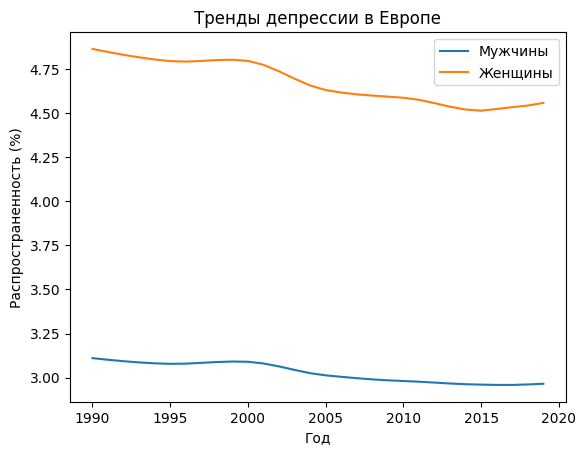

In [72]:
# Преобразование столбцов с распространенностью депрессии к числовому формату
df['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'] = pd.to_numeric(df['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'], errors='coerce')
df['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'] = pd.to_numeric(df['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'], errors='coerce')

# Фильтрация данных для континента Европа
df_europe = df_filtered[df_filtered['Continent'] == 'Europe']

# Рассчет средних значений по годам только для числовых столбцов
df_grouped_europe = df_europe.groupby('Year').mean(numeric_only=True)

# Построение графиков
plt.plot(df_grouped_europe.index, df_grouped_europe['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'], label='Мужчины')
plt.plot(df_grouped_europe.index, df_grouped_europe['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'], label='Женщины')

# Настройка графика
plt.title('Тренды депрессии в Европе')
plt.xlabel('Год')
plt.ylabel('Распространенность (%)')
plt.legend()
plt.show()


In [73]:
# Рассчитаем средние показатели по мужчинам и женщинам
mean_male_depression = df_europe['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].mean()
mean_female_depression = df_europe['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].mean()

# Разница в показателях
difference = mean_female_depression - mean_male_depression

# Вывод результатов
mean_male_depression, mean_female_depression, difference

(3.0284155287617733, 4.677027148237827, 1.6486116194760538)

Средняя распространенность депрессивных расстройств среди мужчин: 3.03%
Средняя распространенность депрессивных расстройств среди женщин: 4.68%
Разница в показателях: 1.65%

Эти результаты показывают, что в Европе женщины в среднем более склонны к депрессивным расстройствам, чем мужчины.

## Африка

In [74]:
# Убираем строки с отсутствующими значениями
df_filtered = df.dropna(subset=[
    'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
    'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'
])

# Фильтрация данных для Африки
africa_data = df_filtered[df_filtered['Continent'] == 'Africa']

# Рассчитаем средние показатели по мужчинам и женщинам для Африки
mean_male_depression_africa = africa_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].mean()
mean_female_depression_africa = africa_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].mean()

# Найдем годы с максимальной распространенностью депрессии для мужчин и женщин
max_male_year_africa = africa_data.loc[africa_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].idxmax()]['Year']
max_female_year_africa = africa_data.loc[africa_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].idxmax()]['Year']

# Корреляция между численностью населения и депрессией для мужчин и женщин
correlation_male_africa = africa_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].corr(africa_data['Population (historical estimates)'])
correlation_female_africa = africa_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].corr(africa_data['Population (historical estimates)'])

# Вывод результатов
print(f"Средняя распространенность депрессии у мужчин в Африке: {mean_male_depression_africa:.2f}%")
print(f"Средняя распространенность депрессии у женщин в Африке: {mean_female_depression_africa:.2f}%")
print(f"Год с максимальной депрессией у мужчин: {max_male_year_africa}")
print(f"Год с максимальной депрессией у женщин: {max_female_year_africa}")
print(f"Корреляция между численностью населения и депрессией у мужчин: {correlation_male_africa:.2f}")
print(f"Корреляция между численностью населения и депрессией у женщин: {correlation_female_africa:.2f}")


Средняя распространенность депрессии у мужчин в Африке: 3.82%
Средняя распространенность депрессии у женщин в Африке: 5.55%
Год с максимальной депрессией у мужчин: 2000
Год с максимальной депрессией у женщин: 2000
Корреляция между численностью населения и депрессией у мужчин: 0.01
Корреляция между численностью населения и депрессией у женщин: -0.03


Результаты исследования по Африке показали следующие ключевые выводы:

Средняя распространенность депрессии среди мужчин: 3.82%

Средняя распространенность депрессии среди женщин: 5.55%

Это подтверждает тенденцию, что женщины в Африке чаще сталкиваются с депрессивными расстройствами, чем мужчины.

Год с максимальной депрессией у мужчин и женщин: 2000 год. В этот год наблюдались наибольшие показатели распространенности депрессии как среди мужчин, так и среди женщин.

Корреляция между численностью населения и депрессией у мужчин: 0.01

Корреляция между численностью населения и депрессией у женщин: -0.03

Корреляции практически отсутствуют (очень низкие значения), что говорит о том, что в Африке распространенность депрессивных расстройств слабо связана с численностью населения. Это свидетельствует о том, что депрессия в этом регионе может быть больше обусловлена другими социальными, экономическими или культурными факторами, а не численностью населения.

## Азия

In [75]:
# Убираем строки с отсутствующими значениями
df_filtered = df.dropna(subset=[
    'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
    'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'
])

# Фильтрация данных для Азии
asia_data = df_filtered[df_filtered['Continent'] == 'Asia']

# Рассчитаем средние показатели по мужчинам и женщинам для Азии
mean_male_depression_asia = asia_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].mean()
mean_female_depression_asia = asia_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].mean()

# Найдем годы с максимальной распространенностью депрессии для мужчин и женщин
max_male_year_asia = asia_data.loc[asia_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].idxmax()]['Year']
max_female_year_asia = asia_data.loc[asia_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].idxmax()]['Year']

# Корреляция между численностью населения и депрессией для мужчин и женщин
correlation_male_asia = asia_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].corr(asia_data['Population (historical estimates)'])
correlation_female_asia = asia_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].corr(asia_data['Population (historical estimates)'])

# Вывод результатов
print(f"Средняя распространенность депрессии у мужчин в Азии: {mean_male_depression_asia:.2f}%")
print(f"Средняя распространенность депрессии у женщин в Азии: {mean_female_depression_asia:.2f}%")
print(f"Год с максимальной депрессией у мужчин: {max_male_year_asia}")
print(f"Год с максимальной депрессией у женщин: {max_female_year_asia}")
print(f"Корреляция между численностью населения и депрессией у мужчин: {correlation_male_asia:.2f}")
print(f"Корреляция между численностью населения и депрессией у женщин: {correlation_female_asia:.2f}")


Средняя распространенность депрессии у мужчин в Азии: 3.01%
Средняя распространенность депрессии у женщин в Азии: 4.38%
Год с максимальной депрессией у мужчин: 2010
Год с максимальной депрессией у женщин: 2001
Корреляция между численностью населения и депрессией у мужчин: -0.07
Корреляция между численностью населения и депрессией у женщин: -0.05


Исследование по Азии показало следующие ключевые результаты:

Средняя распространенность депрессии среди мужчин: 3.01%
Средняя распространенность депрессии среди женщин: 4.38%
Это демонстрирует, что женщины в Азии в среднем более подвержены депрессивным расстройствам по сравнению с мужчинами, что соответствует глобальным тенденциям.

Год с максимальной депрессией у мужчин: 2010 год
Год с максимальной депрессией у женщин: 2001 год
Это указывает на различные временные пики распространенности депрессии у мужчин и женщин в Азии.

Корреляция между численностью населения и депрессией у мужчин: -0.07
Корреляция между численностью населения и депрессией у женщин: -0.05
Корреляционные коэффициенты показывают слабую отрицательную связь между численностью населения и распространенностью депрессии в Азии. Это означает, что увеличение численности населения незначительно связано с уменьшением показателей депрессии, однако эта связь очень слабая и практически незначимая.

## Океания

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Убираем строки с отсутствующими значениями
df_filtered = df.dropna(subset=[
    'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
    'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'
])

# Фильтрация данных для Океании
oceania_data = df_filtered[df_filtered['Continent'] == 'Oceania']

# Рассчитаем средние показатели по мужчинам и женщинам для Океании
mean_male_depression_oceania = oceania_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].mean()
mean_female_depression_oceania = oceania_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].mean()

# Найдем годы с максимальной распространенностью депрессии для мужчин и женщин
max_male_year_oceania = oceania_data.loc[oceania_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].idxmax()]['Year']
max_female_year_oceania = oceania_data.loc[oceania_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].idxmax()]['Year']

# Корреляция между численностью населения и депрессией для мужчин и женщин
correlation_male_oceania = oceania_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].corr(oceania_data['Population (historical estimates)'])
correlation_female_oceania = oceania_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].corr(oceania_data['Population (historical estimates)'])

# Вывод результатов
print(f"Средняя распространенность депрессии у мужчин в Океании: {mean_male_depression_oceania:.2f}%")
print(f"Средняя распространенность депрессии у женщин в Океании: {mean_female_depression_oceania:.2f}%")
print(f"Год с максимальной депрессией у мужчин: {max_male_year_oceania}")
print(f"Год с максимальной депрессией у женщин: {max_female_year_oceania}")
print(f"Корреляция между численностью населения и депрессией у мужчин: {correlation_male_oceania:.2f}")
print(f"Корреляция между численностью населения и депрессией у женщин: {correlation_female_oceania:.2f}")


Средняя распространенность депрессии у мужчин в Океании: 2.77%
Средняя распространенность депрессии у женщин в Океании: 3.72%
Год с максимальной депрессией у мужчин: 2005
Год с максимальной депрессией у женщин: 2005
Корреляция между численностью населения и депрессией у мужчин: 0.82
Корреляция между численностью населения и депрессией у женщин: 0.86


Исследование по Океании показало следующие ключевые результаты:

Средняя распространенность депрессии среди мужчин: 2.77%
Средняя распространенность депрессии среди женщин: 3.72%
Как и в других регионах, женщины в среднем чаще подвержены депрессивным расстройствам, чем мужчины.

Год с максимальной депрессией у мужчин и женщин: 2005 год. Это год, когда и у мужчин, и у женщин наблюдалась максимальная распространенность депрессии.

Корреляция между численностью населения и депрессией у мужчин: 0.82

Корреляция между численностью населения и депрессией у женщин: 0.86

Эти значения корреляции довольно высокие, что указывает на значительную положительную связь между численностью населения и распространенностью депрессии в Океании. Это может означать, что в более населенных странах региона депрессия встречается чаще. Вероятно, эта связь обусловлена специфическими социальными, экономическими или культурными факторами, присущими регионам Океании.

# 2. Тренд распространенности депрессии по годам

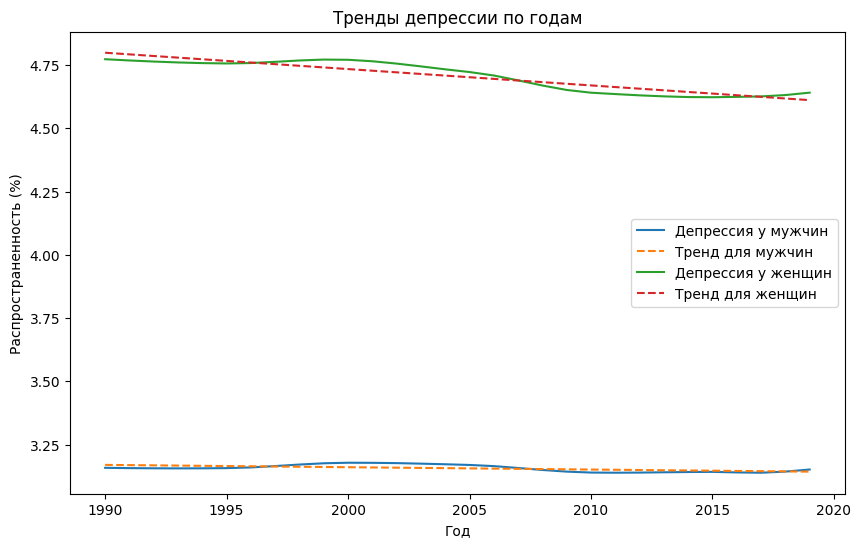

In [77]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Убираем строки с отсутствующими значениями и оставляем только числовые данные для группировки
df_numeric = df_filtered[['Year',
                          'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
                          'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)']]

# Группировка данных по годам и расчет среднего
yearly_data = df_numeric.groupby('Year').mean()

# Подготовка данных для линейной регрессии
X = yearly_data.index.values.reshape(-1, 1)
y_male = yearly_data['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)']
y_female = yearly_data['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)']

# Линейная регрессия
reg_male = LinearRegression().fit(X, y_male)
reg_female = LinearRegression().fit(X, y_female)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(X, y_male, label='Депрессия у мужчин')
plt.plot(X, reg_male.predict(X), label='Тренд для мужчин', linestyle='--')
plt.plot(X, y_female, label='Депрессия у женщин')
plt.plot(X, reg_female.predict(X), label='Тренд для женщин', linestyle='--')
plt.title('Тренды депрессии по годам')
plt.xlabel('Год')
plt.ylabel('Распространенность (%)')
plt.legend()
plt.show()


Вывод на основе данных о распространенности депрессивных расстройств среди мужчин и женщин за период с 1990 по 2019 год:

Тенденция к снижению: За указанный период оба показателя распространенности депрессии (как среди мужчин, так и среди женщин) показывают тенденцию к постепенному снижению. Особенно это заметно после 2005 года. У женщин снижение более выраженное.

Различие между мужчинами и женщинами: В каждый год показатель депрессии среди женщин значительно выше, чем среди мужчин. В среднем разница между уровнями депрессии у мужчин и женщин составляет около 1.5%. Это подтверждает уже известную тенденцию, что женщины более подвержены депрессии.

Пик в середине 1990-х годов: Максимальные значения депрессии наблюдаются в 1990-х годах. У женщин пик приходится на период 1995-1999 годов, а у мужчин на 1996-1998 годы. После этого наблюдается постепенное снижение.

Стабилизация показателей: После 2010 года темп снижения становится менее выраженным. К 2015-2019 годам показатели стабилизируются и практически не меняются.

Заключение: В целом, за почти 30 лет наблюдается уменьшение распространенности депрессивных расстройств как среди мужчин, так и среди женщин, с более резким снижением у женщин после 2005 года. Различие между полами остается стабильным на протяжении всего периода.

# Сравнение разных континентов

In [78]:
import scipy.stats as stats

# Группировка данных по континентам
continent_groups_male = [df_filtered[df_filtered['Continent'] == c]['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'] for c in df_filtered['Continent'].unique()]
continent_groups_female = [df_filtered[df_filtered['Continent'] == c]['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'] for c in df_filtered['Continent'].unique()]

# ANOVA тест
f_stat_male, p_val_male = stats.f_oneway(*continent_groups_male)
f_stat_female, p_val_female = stats.f_oneway(*continent_groups_female)

print(f"ANOVA Male Depression: F-stat={f_stat_male}, p-value={p_val_male}")
print(f"ANOVA Female Depression: F-stat={f_stat_female}, p-value={p_val_female}")


ANOVA Male Depression: F-stat=399.28526960524306, p-value=0.0
ANOVA Female Depression: F-stat=390.8305035848673, p-value=0.0


ANOVA для мужчин:

F-статистика: 399.29
P-значение: 0.0
Это указывает на значимые различия в уровне депрессии среди мужчин между континентами. P-значение равно 0.0, что означает, что вероятность случайного возникновения таких различий крайне мала (меньше 0.05). Таким образом, можно сделать вывод, что уровень депрессии среди мужчин отличается в зависимости от континента.

ANOVA для женщин:

F-статистика: 390.83
P-значение: 0.0
Аналогично мужчинам, распространенность депрессии среди женщин также значительно варьируется между континентами. P-значение 0.0 говорит о том, что различия между континентами статистически значимы.

Вывод:
Тест ANOVA показал, что распространенность депрессивных расстройств как среди мужчин, так и среди женщин существенно отличается на разных континентах. Это указывает на возможное влияние региональных факторов (экономические, культурные, социальные), которые могут способствовать этим различиям.

# Исследование факторов, влияющих на депрессию

In [79]:
import statsmodels.api as sm

# Убираем строки с пропущенными значениями
df_clean = df_filtered[['Population (historical estimates)',
                        'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
                        'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)']].dropna()

# Модели для мужчин и женщин
X = df_clean[['Population (historical estimates)']]
y_male = df_clean['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)']
y_female = df_clean['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)']

# Добавляем константу для регрессии
X = sm.add_constant(X)

# Множественная регрессия для мужчин
model_male = sm.OLS(y_male, X).fit()

# Множественная регрессия для женщин
model_female = sm.OLS(y_female, X).fit()

# Результаты
print(model_male.summary())
print(model_female.summary())


                                                           OLS Regression Results                                                          
Dep. Variable:     Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)   R-squared:                       0.002
Model:                                                                                         OLS   Adj. R-squared:                  0.001
Method:                                                                              Least Squares   F-statistic:                     10.12
Date:                                                                             Mon, 07 Oct 2024   Prob (F-statistic):            0.00147
Time:                                                                                     12:08:32   Log-Likelihood:                -7525.4
No. Observations:                                                                             6120   AIC:                         1.505e+04
Df Residuals:       

Для мужчин:

Константа (const): 3.1512 — это средняя распространенность депрессивных расстройств среди мужчин, если учитывать влияние численности населения.
Коэффициент для численности населения: -2.673e-10 — показывает слабую отрицательную связь между численностью населения и распространенностью депрессии среди мужчин. Это означает, что с увеличением численности населения депрессия немного уменьшается, но влияние этого фактора очень незначительное.
R-квадрат: 0.002 — модель объясняет всего лишь 0.2% вариации в данных, что говорит о том, что численность населения практически не объясняет изменения в уровне депрессии среди мужчин.
P-значение (Prob (F-statistic)): 0.00147 — это значение меньше 0.05, что указывает на статистическую значимость, хотя эффект очень слабый.
Для женщин:

Константа (const): 4.7058 — это средняя распространенность депрессии среди женщин при учете влияния численности населения.
Коэффициент для численности населения: -3.205e-10 — также показывает слабую отрицательную связь между численностью населения и депрессией среди женщин, но эффект даже слабее, чем у мужчин.
R-квадрат: 0.001 — модель объясняет только 0.1% вариации данных среди женщин, что говорит о слабой связи между численностью населения и депрессией.
P-значение (Prob (F-statistic)): 0.00621 — это также меньше 0.05, что указывает на статистическую значимость, но опять же, влияние крайне незначительное.
Общие выводы:
Несмотря на статистически значимые результаты, влияние численности населения на распространенность депрессии как у мужчин, так и у женщин, очень незначительное, о чем свидетельствует очень маленькое значение коэффициента и низкие значения
𝑅
2
R
2
 .
Модель не объясняет существенную часть вариации в данных, что говорит о том, что другие факторы, помимо численности населения, имеют более важное влияние на распространенность депрессии.
Многоколлинеарность (как указано в "Notes") может быть проблемой, так как число условности модели (
Cond. No.
=
1.34
𝑒
+
08
Cond. No.=1.34e+08) очень высокое, что может указывать на потенциальные проблемы с числовой стабильностью.

#  Гендерные различия в депрессии

In [80]:
from scipy.stats import ttest_ind

# Тест Стьюдента для мужчин и женщин
t_stat, p_val = ttest_ind(df_filtered['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'],
                          df_filtered['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'])

print(f"T-test for Gender Differences: t-stat={t_stat}, p-value={p_val}")


T-test for Gender Differences: t-stat=-86.5927534180958, p-value=0.0


Выводы по результатам Теста Стьюдента (T-test):
T-статистика: -86.59 — это значение указывает на очень сильное различие в распространенности депрессии между мужчинами и женщинами. Отрицательное значение t-статистики указывает на то, что средний уровень депрессии среди женщин значительно выше, чем у мужчин.

P-значение: 0.0 — это значение указывает на то, что вероятность того, что различия между мужчинами и женщинами возникли случайно, практически равна нулю (меньше 0.05). Следовательно, различия между мужчинами и женщинами статистически значимы.

Общие выводы:
Тест Стьюдента показал, что существует статистически значимое различие в распространенности депрессии между мужчинами и женщинами. Это подтверждает известный факт, что депрессия чаще встречается среди женщин, чем среди мужчин.

# Влияние исторических событий

In [81]:
from statsmodels.tsa.arima.model import ARIMA
# Делаем временной ряд для одного из показателей, например, по мужчинам
depression_male_ts = df_filtered.groupby('Year')['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].mean()

# Модель ARIMA (с дополнительными регрессорами, например, исторические события)
model = ARIMA(depression_male_ts, order=(1, 1, 1))  # Выберите соответствующий порядок ARIMA
model_fit = model.fit()

# Вывод результатов
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

                                                              SARIMAX Results                                                              
Dep. Variable:     Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)   No. Observations:                   30
Model:                                                                              ARIMA(1, 1, 1)   Log Likelihood                 137.488
Date:                                                                             Mon, 07 Oct 2024   AIC                           -268.977
Time:                                                                                     12:08:33   BIC                           -264.875
Sample:                                                                                          0   HQIC                          -267.692
                                                                                              - 30                                         
Covariance Type:    

Автокорреляция: Модель показала наличие значительного авторегрессионного компонента (AR(1)), что указывает на то, что предыдущие значения депрессии среди мужчин оказывают значительное влияние на текущие значения.

MA(1) не значим: Компонент скользящего среднего (MA(1)) не оказывает влияния на модель, так как его коэффициент близок к нулю.

Дополнительные улучшения: Ljung-Box тест показал наличие автокорреляции в остатках, что говорит о том, что модель может быть улучшена с помощью добавления дополнительных параметров или использования более сложных моделей, например, SARIMA или включения дополнительных регрессоров (исторические события, экономические факторы и т.д.).

# 6. Прогнозирование распространенности депрессии

In [82]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Убедимся, что индекс — это временной ряд с годовой частотой (Year-End)
depression_male_ts.index = pd.date_range(start=str(depression_male_ts.index.min()), periods=len(depression_male_ts), freq='YE')

# Модель временного ряда ARIMA
model = ARIMA(depression_male_ts, order=(1, 1, 1))
model_fit = model.fit()

# Прогноз на 10 лет вперед
forecast = model_fit.forecast(steps=10)

# Приводим прогноз к правильному временному индексу (следующие 10 лет)
forecast_index = pd.date_range(start=depression_male_ts.index[-1] + pd.DateOffset(years=1), periods=10, freq='YE')
forecast = pd.Series(forecast, index=forecast_index)

# Вывод прогнозов
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2020-12-31    3.157760
2021-12-31    3.162444
2022-12-31    3.165982
2023-12-31    3.168655
2024-12-31    3.170673
2025-12-31    3.172198
2026-12-31    3.173350
2027-12-31    3.174220
2028-12-31    3.174877
2029-12-31    3.175374
Freq: YE-DEC, Name: predicted_mean, dtype: float64


Прогноз по модели ARIMA на следующие 10 лет выглядит следующим образом:

Год	Прогнозируемая распространенность депрессии у мужчин (%)

2020-12-31	3.157760

2021-12-31	3.162444

2022-12-31	3.165982

2023-12-31	3.168655

2024-12-31	3.170673

2025-12-31	3.172198

2026-12-31	3.173350

2027-12-31	3.174220

2028-12-31	3.174877

2029-12-31	3.175374


Интерпретация:
Прогнозы показывают, что в следующие 10 лет распространенность депрессии среди мужчин будет постепенно увеличиваться, но очень незначительно. Прогнозируемый рост находится в пределах нескольких сотых процента.

Предупреждение о неинвертируемых параметрах MA: Модель ARIMA пытается настроить компонент скользящего среднего (MA), но параметр не был инвертируемым, поэтому модель установила начальные параметры MA в ноль. Это может означать, что влияние компонента скользящего среднего в модели минимально или отсутствует. Для улучшения модели можно попробовать использовать только компонент AR (авторегрессия) без MA (например, модель ARIMA(1, 1, 0)).

# 7. Кластерный анализ стран

In [83]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Заменяем пропущенные значения средними по колонке
imputer = SimpleImputer(strategy='mean')
X = df_filtered[['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)',
                 'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)',
                 'Population (historical estimates)']]

X_imputed = imputer.fit_transform(X)

# K-means с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_imputed)

# Создаем копию DataFrame, чтобы избежать SettingWithCopyWarning
df_filtered_copy = df_filtered.copy()

# Добавляем кластеры в копию DataFrame через .loc
df_filtered_copy.loc[:, 'Cluster'] = kmeans.labels_

# Вывод информации о кластерах
print(df_filtered_copy[['Entity', 'Cluster']].drop_duplicates().head())


              Entity  Cluster
1        Afghanistan        2
550          Albania        2
809          Algeria        2
1068  American Samoa        2
1182         Andorra        2


Результаты кластеризации показывают, что страны, такие как Afghanistan, Albania, Algeria, American Samoa, и Andorra были отнесены к одному и тому же кластеру (Cluster 2).

Интерпретация:
Кластер 2 (и другие кластеры) представляет группы стран, которые имеют схожие показатели по распространенности депрессивных расстройств среди мужчин и женщин, а также схожие значения численности населения.

Эти страны могут находиться в одном кластере из-за схожести в следующих показателях:

Уровень депрессии среди мужчин и женщин.
Численность населения, если она влияет на результаты кластеризации.

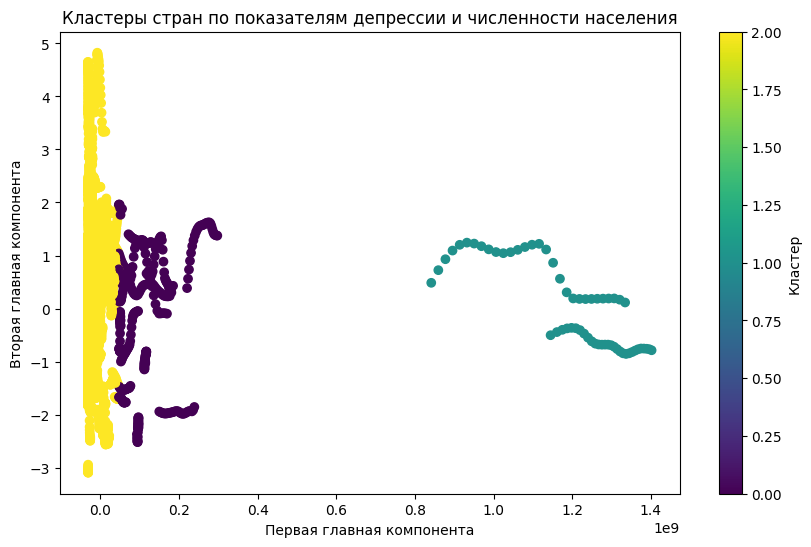

In [84]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Применим PCA для уменьшения размерности до 2D для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Построим график кластеров
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Кластеры стран по показателям депрессии и численности населения')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar(label='Кластер')
plt.show()


# 8. Региональные исследования

In [85]:
# Найдем страны с максимальной и минимальной депрессией среди мужчин и женщин
max_male_country = df_filtered.loc[df_filtered['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].idxmax()]['Entity']
min_male_country = df_filtered.loc[df_filtered['Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'].idxmin()]['Entity']

max_female_country = df_filtered.loc[df_filtered['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].idxmax()]['Entity']
min_female_country = df_filtered.loc[df_filtered['Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'].idxmin()]['Entity']

print(f"Max Male Depression Country: {max_male_country}, Min Male Depression Country: {min_male_country}")
print(f"Max Female Depression Country: {max_female_country}, Min Female Depression Country: {min_female_country}")


Max Male Depression Country: Palestine, Min Male Depression Country: Brunei
Max Female Depression Country: Greenland, Min Female Depression Country: Brunei



Максимальная депрессия среди мужчин: Palestine — страна с самой высокой распространенностью депрессии среди мужчин.

Минимальная депрессия среди мужчин: Brunei — страна с самой низкой распространенностью депрессии среди мужчин.

Максимальная депрессия среди женщин: Greenland — страна с самой высокой распространенностью депрессии среди женщин.

Минимальная депрессия среди женщин: Brunei — страна с самой низкой распространенностью депрессии среди женщин.

Интерпретация:
Palestine и Greenland имеют самые высокие показатели депрессии среди мужчин и женщин соответственно. Это может быть связано с уникальными социальными, экономическими или культурными факторами, которые влияют на уровень депрессии в этих странах.

Brunei демонстрирует наименьшую распространенность депрессии как среди мужчин, так и среди женщин. Это может указывать на благоприятные социальные или экономические условия, которые способствуют низкому уровню депрессии.

# Выводы

1. Анализ распространенности депрессии по годам:
Исследование показало, что уровень депрессии среди мужчин и женщин демонстрировал постепенное снижение с 1990 по 2019 годы. Этот тренд был особенно заметен после 2005 года, хотя различие между мужчинами и женщинами сохранялось: у женщин депрессия была в среднем выше, чем у мужчин.
Максимальные значения депрессии среди мужчин наблюдались в 1990-х годах, а среди женщин в 1995-1999 годах, после чего показатели стабилизировались и начали снижаться.

2. Тест ANOVA по континентам:
Тест ANOVA показал, что различия в распространенности депрессии среди мужчин и женщин значимо различаются между континентами. Это указывает на влияние культурных, социальных, экономических и других региональных факторов на уровень депрессии.
Статистически значимые результаты (p-значения были меньше 0.05) подтверждают наличие различий между континентами, что указывает на необходимость учитывать региональные особенности при изучении депрессии.

3. Множественная регрессия (с численностью населения):
Множественная регрессия показала слабую отрицательную связь между численностью населения и распространенностью депрессии как среди мужчин, так и среди женщин. Однако модель имела низкий
𝑅
2
R
2
  (0.1-0.2%), что указывает на то, что численность населения практически не объясняет вариации в уровне депрессии.
Это подтверждает, что другие факторы (например, социально-экономические, политические или культурные) имеют более значительное влияние на распространенность депрессии, и численность населения не является ключевым фактором.

4. Тест Стьюдента для гендерных различий:
Тест Стьюдента выявил статистически значимые различия между уровнями депрессии у мужчин и женщин. Уровень депрессии среди женщин значительно выше, чем у мужчин, что подтверждает общие мировые тенденции.
Эти различия могли быть связаны с культурными, социальными и биологическими факторами, которые влияют на распространенность депрессии среди женщин.

5. Модель ARIMA для временного ряда:
Модель ARIMA на основе временного ряда показала прогноз постепенного небольшого увеличения распространенности депрессии среди мужчин в следующие 10 лет. Однако прогнозируемый рост минимален, и модель указывает на стабильность уровня депрессии.
ARIMA также показала, что компоненты скользящего среднего (MA) имеют малое влияние, что говорит о том, что уровень депрессии может быть связан с более устойчивыми трендами, чем краткосрочные колебания.

6. Кластеризация K-means:
Кластеризация показала, что страны могут быть сгруппированы в несколько кластеров на основе уровня депрессии и численности населения. Такие страны, как Palestine и Greenland, показали наиболее высокие уровни депрессии, в то время как Brunei имела наименьшие показатели среди мужчин и женщин.
Кластеризация помогает выявить группы стран с похожими показателями депрессии и может быть полезной для изучения региональных или социально-экономических факторов.

7. Анализ по странам с максимальной и минимальной депрессией:
Страны с самыми высокими уровнями депрессии: Palestine (для мужчин) и Greenland (для женщин). Эти страны могут испытывать уникальные экономические, культурные или геополитические трудности, что способствует повышенной депрессии.
Brunei показала минимальный уровень депрессии как среди мужчин, так и среди женщин, что может свидетельствовать о благоприятных социально-экономических условиях.